In [4]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
from hyperion.model import ModelOutput
# constants setup
c = const.c.cgs.value
pc = const.pc.cgs.value
au = const.au.cgs.value
# Image in the unit of MJy/sr
# Change it into erg/s/cm2/Hz/sr
factor = 1e-23*1e6
factor = 1

In [10]:
filename_reg = '/Users/yaolun/test/model12.rtout'
filename_r2 = '/Users/yaolun/test/model13.rtout'
filename_r15 = '/Users/yaolun/test/model17.rtout'
filename_uni = '/Users/yaolun/test/model62.rtout'
wl_aper = [3.6, 4.5, 5.8, 8.0, 8.5, 9, 9.7, 10, 10.5, 11, 16, 20, 24, 35, 70, 100, 160, 250, 350, 500, 850]
wav = c/freq/1e9*1e4
# wav = 40

In [6]:
# regular cavity setting
m_reg = ModelOutput(filename_reg)
image_reg = m_reg.get_image(group=len(wl_aper)+1, inclination=0, distance=178.0*pc, units='MJy/sr')
# Calculate the image width in arcseconds given the distance used above
w = np.degrees((1.5 * pc) / image_reg.distance) * 60.
pix_num = len(image_reg.val[:,0,0])
pix2arcsec = 2*w/pix_num
pix2au = np.radians(2*w/pix_num/3600.)*image_reg.distance/au

iwav = np.argmin(np.abs(wav - image_reg.wav))
# avoid zero in log
val_reg = image_reg.val[:, :, iwav] * factor + 1e-30

# r^-2 cavity setting
m_r2 = ModelOutput(filename_r2)
image_r2 = m_r2.get_image(group=len(wl_aper)+1, inclination=0, distance=178.0*pc, units='MJy/sr')
# Calculate the image width in arcseconds given the distance used above
w = np.degrees((1.5 * pc) / image_r2.distance) * 60.
pix_num = len(image_reg.val[:,0,0])
pix2arcsec = 2*w/pix_num
pix2au = np.radians(2*w/pix_num/3600.)*image_reg.distance/au
iwav = np.argmin(np.abs(wav - image_r2.wav))
# avoid zero in log
val_r2 = image_r2.val[:, :, iwav] * factor + 1e-30

# r^-1.5 cavity setting
m_r15 = ModelOutput(filename_r15)
image_r15 = m_r15.get_image(group=len(wl_aper)+1, inclination=0, distance=178.0*pc, units='MJy/sr')
# Calculate the image width in arcseconds given the distance used above
w = np.degrees((1.5 * pc) / image_r15.distance) * 60.
pix_num = len(image_reg.val[:,0,0])
pix2arcsec = 2*w/pix_num
pix2au = np.radians(2*w/pix_num/3600.)*image_reg.distance/au
iwav = np.argmin(np.abs(wav - image_r15.wav))
# avoid zero in log
val_r15 = image_r15.val[:, :, iwav] * factor + 1e-30

# uniform cavity setting
m_uni = ModelOutput(filename_uni)
image_uni = m_uni.get_image(group=len(wl_aper)+1, inclination=0, distance=178.0*pc, units='MJy/sr')
# Calculate the image width in arcseconds given the distance used above
w = np.degrees((1.5 * pc) / image_uni.distance) * 60.
pix_num = len(image_reg.val[:,0,0])
pix2arcsec = 2*w/pix_num
pix2au = np.radians(2*w/pix_num/3600.)*image_reg.distance/au
iwav = np.argmin(np.abs(wav - image_uni.wav))
# avoid zero in log
val_uni = image_uni.val[:, :, iwav] * factor + 1e-30

## 1-D intensity profile

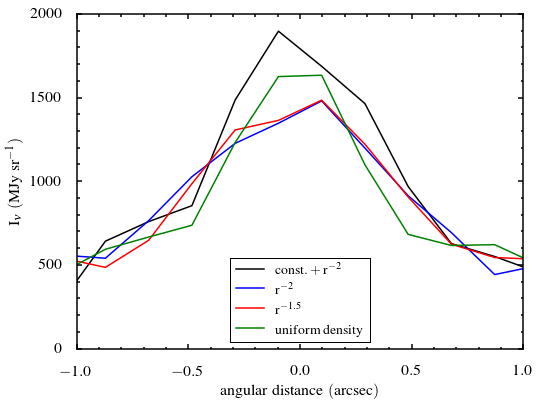

In [43]:
# get y=0 plane, and plot it
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

reg, = ax.plot(np.linspace(-150,150,num=300)*pix2arcsec, val_reg[:,149], color='k', linewidth=1.5)
r2,  = ax.plot(np.linspace(-150,150,num=300)*pix2arcsec, val_r2[:,149], color='b', linewidth=1.5)
r15, = ax.plot(np.linspace(-150,150,num=300)*pix2arcsec, val_r15[:,149], color='r', linewidth=1.5)
uni, = ax.plot(np.linspace(-150,150,num=300)*pix2arcsec, val_uni[:,149], color='g', linewidth=1.5)
ax.legend([reg, r2, r15, uni], [r'$\rm{const.+r^{-2}}$', r'$\rm{r^{-2}}$', r'$\rm{r^{-1.5}}$', r'$\rm{uniform\,density}$'],\
          numpoints=1, loc='lower center', fontsize=16)

ax.set_xlim([-1,1])
ax.set_xlabel(r'$\rm{angular\,distance\,(arcsec)}$', fontsize=16)
# ax.set_ylabel(r'$\rm{I_{\nu}\,(erg~s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1})}$', fontsize=16)
ax.set_ylabel(r'$\rm{I_{\nu}\,(MJy~sr^{-1})}$', fontsize=16)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/test/cavity_intensity_'+freq+'.pdf', format='pdf', dpi=300, bbox_inches='tight')

## 2-D intensity map

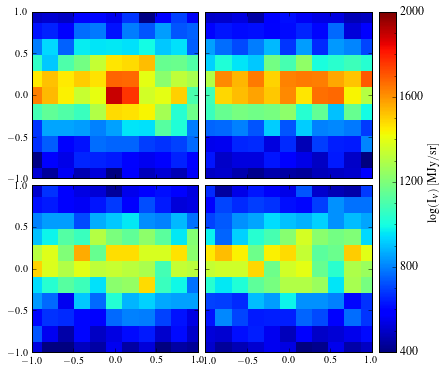

In [7]:
from mpl_toolkits.axes_grid1 import AxesGrid
image_grid = [val_reg, val_uni,val_r2, val_r15]
fig = plt.figure(figsize=(30,30))
grid = AxesGrid(fig, 142, # similar to subplot(142)
                    nrows_ncols = (2, 2),
                    axes_pad = 0.1,
                    share_all=True,
                    label_mode = "L",
                    cbar_location = "right",
                    cbar_mode="single",
                    )
for i in range(4):
    im = grid[i].pcolor(np.linspace(-150,150,num=300)*pix2arcsec, np.linspace(-150,150,num=300)*pix2arcsec,\
                       image_grid[i], cmap=plt.cm.jet, vmin=400, vmax=2000)
    grid[i].set_xlim([-1,1])
    grid[i].set_ylim([-1,1])
#     ax.set_aspect('equal')
cb = grid.cbar_axes[0].colorbar(im)
cb.solids.set_edgecolor("face")
cb.ax.minorticks_on()
cb.ax.set_ylabel(r'$\rm{log(I_{\nu})\,[MJy/sr]}$',fontsize=12)
cb_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cb_obj,fontsize=12)

fig.savefig('/Users/yaolun/test/cavity_2d_intensity_'+freq+'.png',format='png',dpi=300,bbox_inches='tight')

## Investigate the intensity profile in caivty, compare with Spitzer image

###inclination angle of 20,30,40,50 with cavity opening angle of 20

In [1]:
incl50 = '/Users/yaolun/test/model72.rtout'
incl40 = '/Users/yaolun/test/model73.rtout'
incl30 = '/Users/yaolun/test/model74.rtout'
incl20 = '/Users/yaolun/test/model75.rtout'
wl_aper = [3.6, 4.5, 5.8, 8.0, 8.5, 9, 9.7, 10, 10.5, 11, 16, 20, 24, 35, 70, 100, 160, 250, 350, 500, 850]
wav = 3.6

In [6]:
# incl. = 50
m_50 = ModelOutput(incl50)
image_50 = m_50.get_image(group=len(wl_aper)+1, inclination=0, distance=178.0*pc, units='MJy/sr')
# Calculate the image width in arcseconds given the distance used above
w = np.degrees((1.5 * pc) / image_50.distance) * 60.
pix_num = len(image_50.val[:,0,0])
pix2arcsec = 2*w/pix_num
pix2au = np.radians(2*w/pix_num/3600.)*image_50.distance/au

iwav = np.argmin(np.abs(wav - image_50.wav))
# avoid zero in log
val_50 = image_50.val[:, :, iwav] * factor + 1e-30

# incl. = 40
m_40 = ModelOutput(incl40)
image_40 = m_40.get_image(group=len(wl_aper)+1, inclination=0, distance=178.0*pc, units='MJy/sr')
iwav = np.argmin(np.abs(wav - image_40.wav))
# avoid zero in log
val_40 = image_40.val[:, :, iwav] * factor + 1e-30

# incl. = 30
m_30 = ModelOutput(incl30)
image_30 = m_30.get_image(group=len(wl_aper)+1, inclination=0, distance=178.0*pc, units='MJy/sr')
iwav = np.argmin(np.abs(wav - image_30.wav))
# avoid zero in log
val_30 = image_30.val[:, :, iwav] * factor + 1e-30

# incl. = 20
m_20 = ModelOutput(incl20)
image_20 = m_20.get_image(group=len(wl_aper)+1, inclination=0, distance=178.0*pc, units='MJy/sr')
iwav = np.argmin(np.abs(wav - image_20.wav))
# avoid zero in log
val_20 = image_20.val[:, :, iwav] * factor + 1e-30

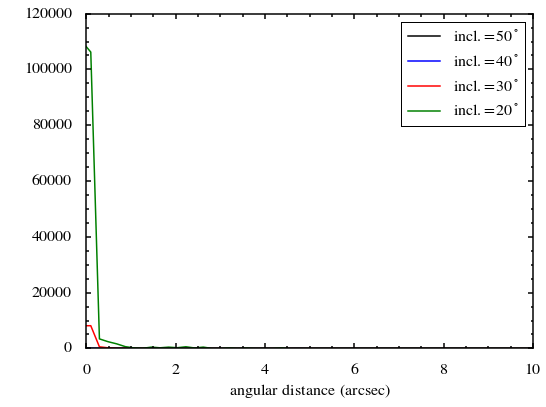

In [12]:
# get x=0 plane, and plot it
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(np.linspace(-150,150,num=300)*pix2arcsec, val_50[149,:], color='k', linewidth=1.5, label=r'$\rm{incl.=50^{\circ}}$')
ax.plot(np.linspace(-150,150,num=300)*pix2arcsec, val_40[149,:], color='b', linewidth=1.5, label=r'$\rm{incl.=40^{\circ}}$')
ax.plot(np.linspace(-150,150,num=300)*pix2arcsec, val_30[149,:], color='r', linewidth=1.5, label=r'$\rm{incl.=30^{\circ}}$')
ax.plot(np.linspace(-150,150,num=300)*pix2arcsec, val_20[149,:], color='g', linewidth=1.5, label=r'$\rm{incl.=20^{\circ}}$')
ax.legend(numpoints=1, loc='upper right', fontsize=16)

ax.set_xlim([0,10])
ax.set_xlabel(r'$\rm{angular\,distance\,(arcsec)}$', fontsize=16)
# ax.set_ylabel(r'$\rm{I_{\nu}\,(erg~s^{-1}\,cm^{-2}\,Hz^{-1}\,sr^{-1})}$', fontsize=16)
ax.set_ylabel(r'$\rm{I_{\nu}\,(MJy~sr^{-1})}$', fontsize=16)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=15,length=2.5)

# fig.savefig('/Users/yaolun/test/cavity_intensity_'+freq+'.pdf', format='pdf', dpi=300, bbox_inches='tight')